In [1]:
import tensorflow as tf 
import numpy as np 
import random 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
import mitdeeplearning as mdl 

In [2]:
mnist = tf.keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

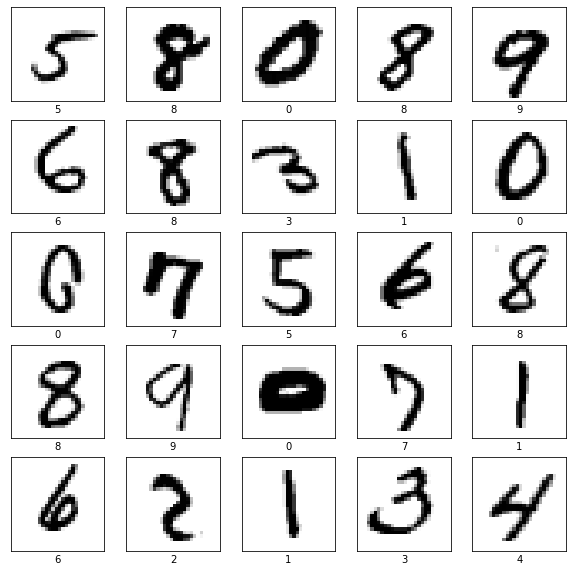

In [5]:
plt.figure(figsize=(10,10))
ri = np.random.choice(60000,25)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = ri[i]
    plt.imshow(np.squeeze(train_images[idx]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[idx])

In [6]:
def fc_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model 

model = fc_model()

In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
             loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
bs = 64 
ep = 5
model.fit(train_images, train_labels, batch_size=bs, epochs=ep)

Epoch 1/5
938/938 [==============================] - 3s 1ms/step - loss: 0.5851 - accuracy: 0.8388
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.9384
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1604 - accuracy: 0.9557
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1213 - accuracy: 0.9655
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.9708


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy of the model:", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9692
Test accuracy of the model: 0.9692000150680542


In [12]:
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(28,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(36,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model 

cnn_model = build_cnn_model()

cnn_model.predict(train_images[[0]])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        9108      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn_model.fit(train_images, train_labels, batch_size=bs, epochs=ep)

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.5585 - accuracy: 0.8264
Epoch 2/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0743 - accuracy: 0.9759
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0475 - accuracy: 0.9856
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0358 - accuracy: 0.9888
Epoch 5/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0316 - accuracy: 0.9902


In [17]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test accuracy of CNN:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.9859
Test accuracy of CNN: 0.9858999848365784


In [18]:
predictions = cnn_model.predict(test_images)

In [19]:
predictions[1]

array([8.5769051e-07, 5.7600000e-06, 9.9999070e-01, 1.5965210e-06,
       3.1364977e-11, 5.0484122e-12, 1.3650163e-07, 5.5877528e-08,
       9.0101560e-07, 1.7893080e-12], dtype=float32)

In [20]:
prediction = np.argmax(predictions[1])
print(prediction)

2


label of this image: 7


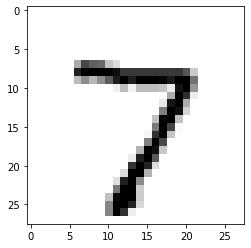

In [30]:
print("label of this image:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

In [31]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100*np.max(predictions_array), true_label), color=color)
    
    
def plot_value(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

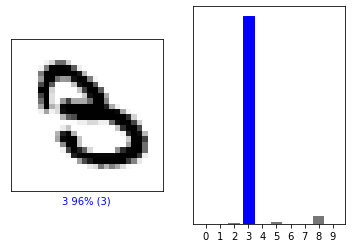

In [32]:
idx = 18
plt.subplot(1,2,1)
plot_image(idx, predictions[idx], test_labels, test_images)
plt.subplot(1,2,2)
plot_value(idx, predictions[idx], test_labels)

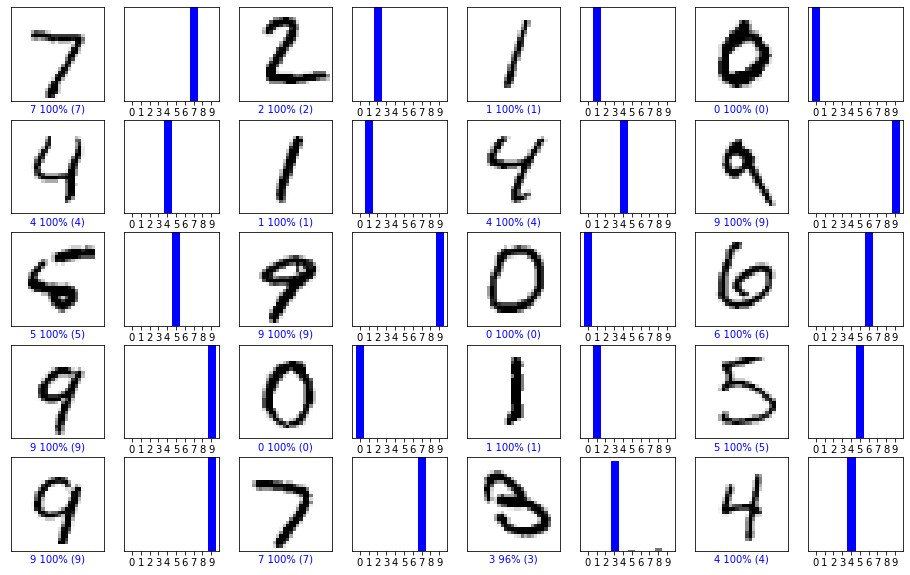

In [34]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value(i, predictions[i], test_labels)

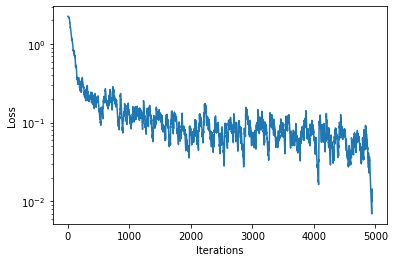

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:57<00:00, 86.61it/s]


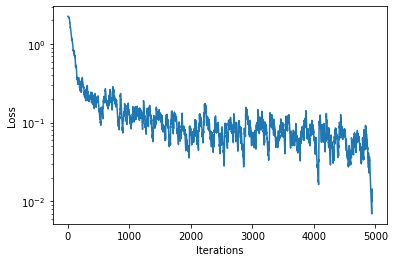

In [36]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm,'_instances'):tqdm._instances.clear()
    
for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
    images = tf.convert_to_tensor(images, dtype=np.float32)
    
    with tf.GradientTape() as tape:
        logits = cnn_model(images)
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
        
    loss_history.append(loss_value.numpy().mean())
    plotter.plot(loss_history.get())
    
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))